Cantidad de registros: 2562
Cantidad de variables: 171
Porcentaje de hogares con computadora: 90.05%


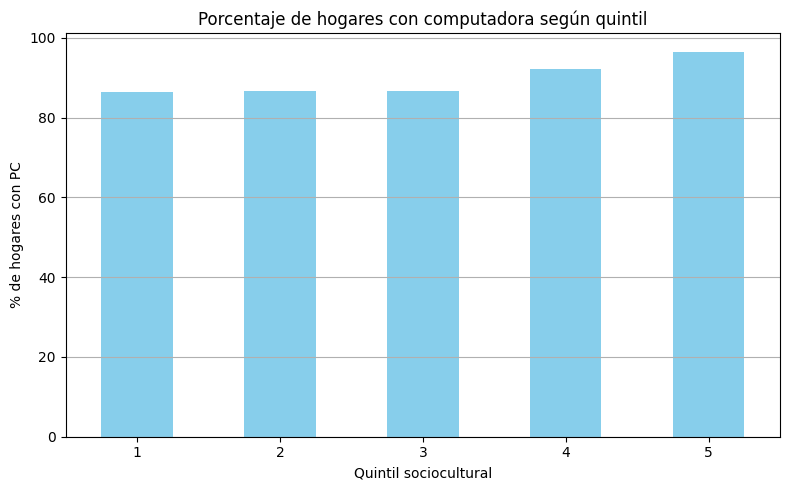

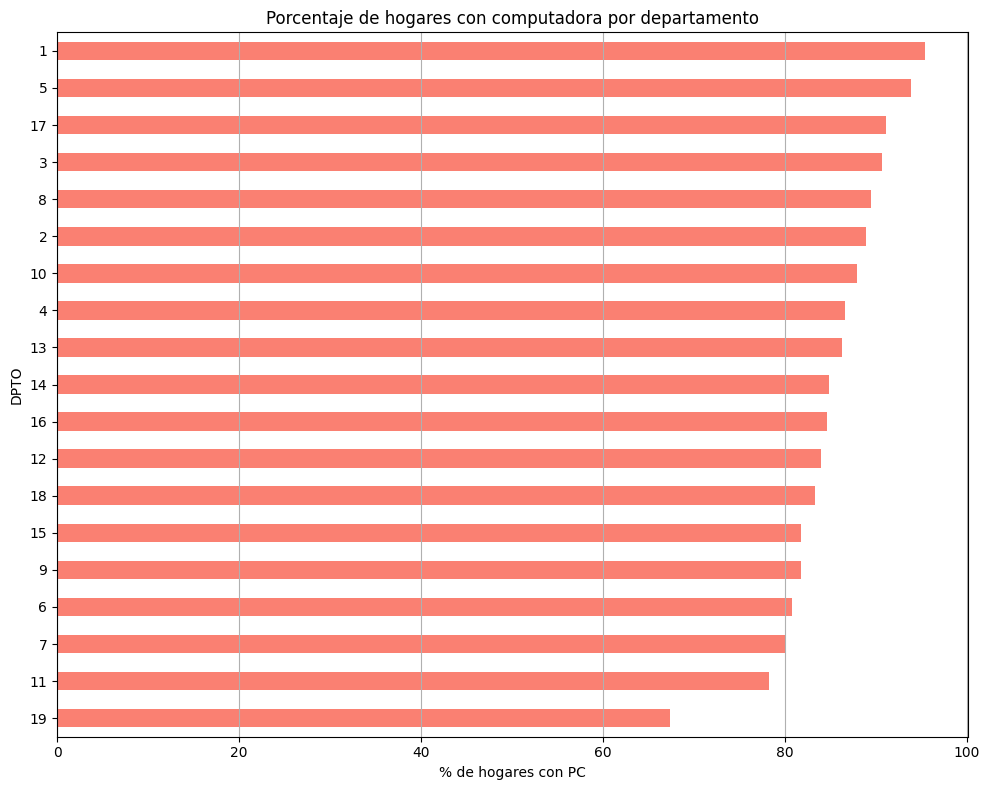

Departamento con menor porcentaje: 19
Hogares con computadora y dispositivo Ceibal: 0


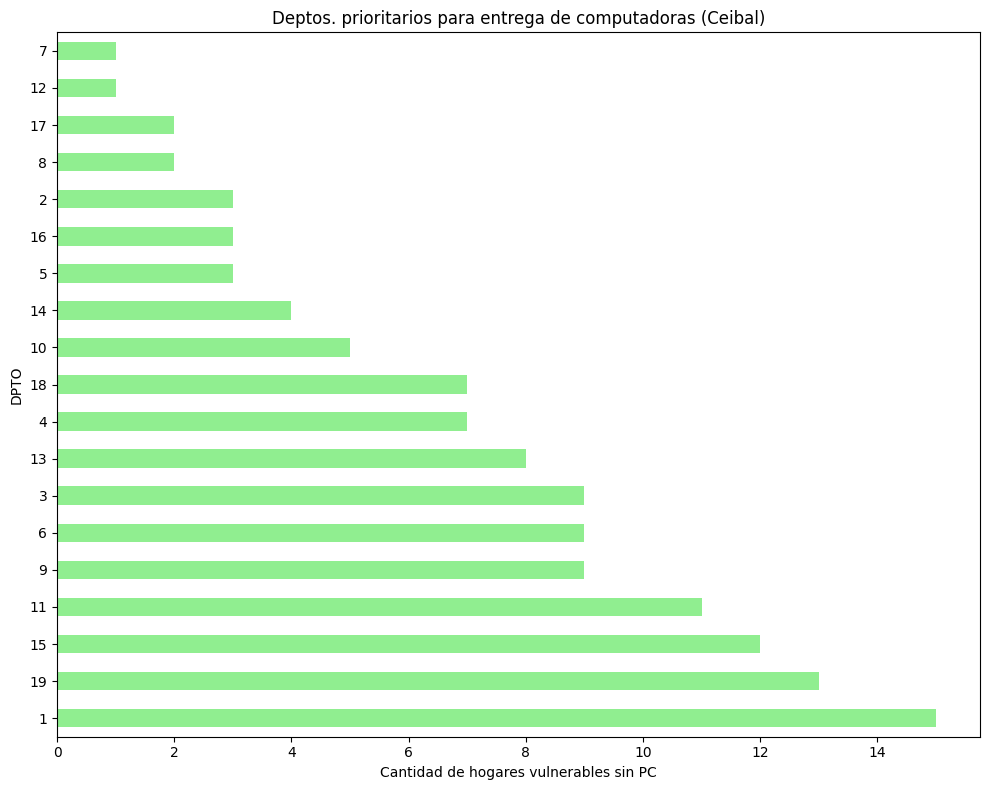

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 1.1 Cargar la base de datos
df = pd.read_csv("EUTIC_encuesta-2022.csv", encoding="latin1")

# Limpiar nombres de columnas y departamentos (opcional pero útil)
df.columns = df.columns.str.strip()
df['DPTO'] = df['DPTO'].astype(str).str.strip().str.title()


# 1.2 ¿Cuántas variables y registros contiene el dataset?
print("Cantidad de registros:", df.shape[0])
print("Cantidad de variables:", df.shape[1])

# 1.3 ¿Cuál es el porcentaje de hogares con computadora?
porcentaje_pc = df['accesointernet_hogar'].mean() * 100
print(f"Porcentaje de hogares con computadora: {porcentaje_pc:.2f}%")

# 1.4 Porcentaje de hogares con computadora según el quintil sociocultural
por_quintil = df.groupby('quintil')['accesointernet_hogar'].mean() * 100

# Gráfico de barras
plt.figure(figsize=(8,5))
por_quintil.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de hogares con computadora según quintil')
plt.ylabel('% de hogares con PC')
plt.xlabel('Quintil sociocultural')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 1.5 Departamento con menor porcentaje de hogares con computadora
por_departamento = df.groupby('DPTO')['accesointernet_hogar'].mean() * 100
por_departamento = por_departamento.sort_values()

# Gráfico horizontal
plt.figure(figsize=(10,8))
por_departamento.plot(kind='barh', color='salmon')
plt.title('Porcentaje de hogares con computadora por departamento')
plt.xlabel('% de hogares con PC')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

print("Departamento con menor porcentaje:", por_departamento.idxmin())

# 1.6 Hogares con computadora que poseen un dispositivo de Ceibal
hogares_con_pc = df[df['accesointernet_hogar'] == 1]
con_ceibal = hogares_con_pc[hogares_con_pc['B3_1_1'] == 1].shape[0]
print(f"Hogares con computadora y dispositivo Ceibal: {con_ceibal}")

# 1.7 Departamentos prioritarios (hogares SIN computadora y quintil 1 o 2)
filtro = (df['accesointernet_hogar'] == 0) & (df['quintil'].isin([1, 2]))
prioritarios = df[filtro].groupby('DPTO').size().sort_values(ascending=False)

# Gráfico de barras horizontales
plt.figure(figsize=(10, 8))
prioritarios.plot(kind='barh', color='lightgreen')
plt.title('Deptos. prioritarios para entrega de computadoras (Ceibal)')
plt.xlabel('Cantidad de hogares vulnerables sin PC')
plt.tight_layout()
plt.show()

